In [1]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
import datetime
import pandas as pd
import seaborn as sns
from scipy.stats import zscore

In [2]:
IMAGE_FOLDER = 'data/images'
CSV_FILENAME = "experiment_data.csv"
PLOT_DATA = True
SAVE_TO_CSV = True
SELECT_RANGE = False
START = 100
END = 200

In [27]:
dic = {"time_405":[],"time_470":[],"intensity_405":[],"intensity_470":[]}
i = 0
for file in os.listdir(IMAGE_FOLDER):
    if file.endswith(".jpg"):
        date_string = file[4:-4]
        format_string = "%y-%m-%d_%H-%M-%S-%f"
        datetime_obj = datetime.datetime.strptime(date_string, format_string)
        img = cv2.imread(os.path.join(IMAGE_FOLDER, file))
        intensity = np.sum(img)
        if i % 2 == 0:
            dic["time_405"].append(datetime_obj)
            dic["intensity_405"].append(intensity)
        else:
            dic["time_470"].append(datetime_obj)
            dic["intensity_470"].append(intensity)
        i+=1
df=pd.DataFrame(dic)
if SELECT_RANGE:
    df = df.iloc[START:END,:]
df["normalized_405"] = zscore(df["intensity_405"])
df["normalized_470"] = zscore(df["intensity_470"])
std = df.std()
std_df = pd.DataFrame(std[["intensity_405","intensity_470","normalized_405", "normalized_470"]]).T.rename(index={0: 'standard deviation'})
df = pd.concat([df, std_df])
display(pd.concat([df.head(n=50), df.tail(1)]))

,time_405,time_470,intensity_405,intensity_470,normalized_405,normalized_470
0,2023-04-19 18:33:25.137793,2023-04-19 18:33:25.204200,1675686,4219497,-0.27414,1.521257
1,2023-04-19 18:33:25.270605,2023-04-19 18:33:25.340917,559158,1771866,-1.063484,-0.206834
2,2023-04-19 18:33:25.406345,2023-04-19 18:33:25.472751,4207107,559140,1.51548,-1.063051
3,2023-04-19 18:33:25.539158,2023-04-19 18:33:25.604585,1680498,4071909,-0.270738,1.417056
4,2023-04-19 18:33:25.670990,2023-04-19 18:33:25.737396,559140,1674966,-1.063497,-0.275248
5,2023-04-19 18:33:25.803803,2023-04-19 18:33:25.871184,4039431,559122,1.396939,-1.063064
6,2023-04-19 18:33:25.937589,2023-04-19 18:33:26.003994,1671132,4031121,-0.27736,1.388259
7,2023-04-19 18:33:26.070400,2023-04-19 18:33:26.139735,559104,1668711,-1.063522,-0.279665
8,2023-04-19 18:33:26.205164,2023-04-19 18:33:26.271569,4029114,559104,1.389646,-1.063076
9,2023-04-19 18:33:26.337978,2023-04-19 18:33:26.425866,1666188,4018929,-0.280855,1.379651


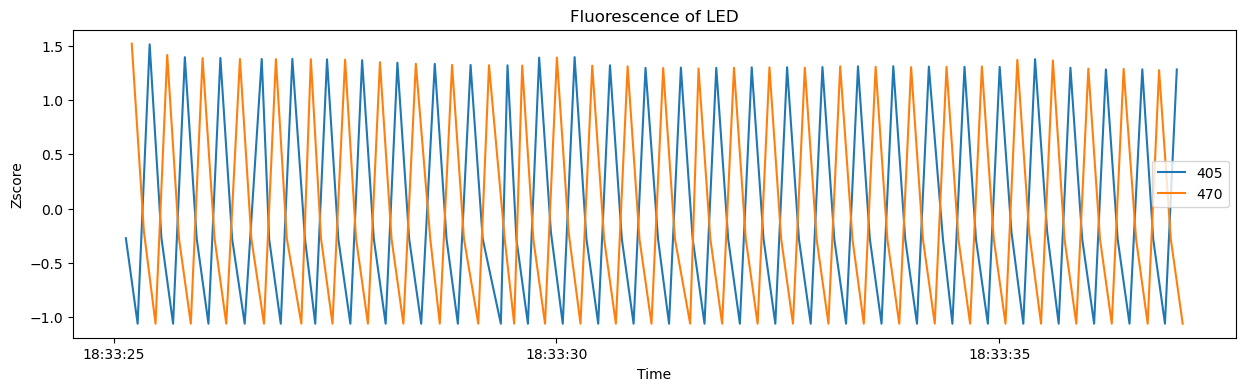

In [23]:
fig, ax = plt.subplots(figsize=(15,4))
sns.lineplot(x='time_405', y='normalized_405', data=df, ax=ax, label='405')
sns.lineplot(x='time_470', y='normalized_470', data=df, ax=ax, label='470')
ax.set_title('Fluorescence of LED')
ax.set_xlabel('Time')
ax.set_ylabel('Zscore')
ax.legend()

plt.show()